In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
amostras_p = pd.read_excel("compilado_positivo.xlsx")
amostras_p.set_index('Wavelength',inplace=True)
amostras_p = amostras_p.T
amostras_p['Diagnostico'] = 'Positivo'
amostras_n = pd.read_excel("compilado_negativo.xlsx")
amostras_n.set_index('Wavelength',inplace=True)
amostras_n = amostras_n.T
amostras_n['Diagnostico'] = 'Negativo'
amostras = amostras_p.append(amostras_n)

In [110]:
amostras.head(10)

Wavelength,350,351,352,353,354,355,356,357,358,359,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,Diagnostico
A3791_e,0.023225,0.023256,0.023233,0.022841,0.020918,0.020383,0.020697,0.020925,0.020588,0.020506,...,0.005530,0.005461,0.005387,0.005297,0.005223,0.005154,0.005089,0.005030,0.004977,Positivo
A3792_e,0.011012,0.009415,0.009336,0.010466,0.010308,0.009649,0.009095,0.008971,0.009065,0.009404,...,0.002891,0.002791,0.002685,0.002567,0.002467,0.002370,0.002278,0.002197,0.002121,Positivo
A3793_e,0.022587,0.022717,0.022223,0.020916,0.019812,0.018976,0.018413,0.017999,0.017348,0.017177,...,0.004460,0.004216,0.003982,0.003744,0.003521,0.003313,0.003111,0.002912,0.002729,Positivo
A3797_e,0.028283,0.026276,0.025200,0.025143,0.023914,0.023573,0.023126,0.021963,0.021399,0.020641,...,0.003192,0.003058,0.002933,0.002817,0.002703,0.002600,0.002496,0.002390,0.002304,Positivo
A3798_e,0.024692,0.023229,0.022823,0.022822,0.021488,0.020784,0.020383,0.019904,0.019754,0.019565,...,0.004339,0.004128,0.003919,0.003715,0.003523,0.003337,0.003151,0.002971,0.002806,Positivo
A3799_c,0.366015,0.374824,0.381755,0.387023,0.394528,0.400384,0.406160,0.413087,0.419693,0.426085,...,0.003669,0.003469,0.003284,0.003105,0.002935,0.002777,0.002629,0.002487,0.002355,Positivo
A3800_e,0.022496,0.021198,0.020521,0.020671,0.019464,0.019413,0.019396,0.018849,0.019936,0.020262,...,0.006494,0.006166,0.005849,0.005523,0.005214,0.004919,0.004639,0.004369,0.004111,Positivo
A3801_e,0.027728,0.025488,0.024150,0.024211,0.024117,0.023509,0.022212,0.020593,0.019979,0.020420,...,0.004813,0.004557,0.004308,0.004063,0.003832,0.003611,0.003401,0.003201,0.003006,Positivo
A3803_c,0.422281,0.430118,0.437644,0.444438,0.451039,0.456977,0.462817,0.468726,0.473342,0.479229,...,0.017040,0.016142,0.015250,0.014354,0.013481,0.012596,0.011753,0.010930,0.010139,Positivo
A3804_e,0.032716,0.031885,0.030963,0.030086,0.028352,0.027686,0.028333,0.029543,0.029042,0.028507,...,0.005652,0.005330,0.005015,0.004685,0.004385,0.004103,0.003829,0.003564,0.003311,Positivo


In [111]:
amostras.loc[ : , amostras.columns != ('Wavelength','Diagnostico')]
amostras_diag = amostras['Diagnostico']

In [112]:
amostras.index

Index(['A3791_e', 'A3792_e', 'A3793_e', 'A3797_e', 'A3798_e', 'A3799_c',
       'A3800_e', 'A3801_e', 'A3803_c', 'A3804_e',
       ...
       'A2638', 'A2639', 'A2640', 'A2641', 'A2642', 'A2645', 'A2646', 'A2647',
       'A2648', 'A2649'],
      dtype='object', length=499)

In [113]:
filtrando_amostras = amostras.loc[:,~amostras.columns.isin(['Diagnostico'])]
filtrando_amostras_1 = filtrando_amostras[(filtrando_amostras < 1).any(1)]

#filtrando_amostras_1 = filtrando_amostras_1.join(amostras_diag)

#amostras = filtrando_amostras_1

In [114]:
drop = filtrando_amostras_1[(filtrando_amostras_1 > 1).any(1)].index
amostras = amostras.drop(drop)

In [213]:
print(amostras.index.unique())
print(amostras.loc[amostras['Diagnostico'] == 'Positivo'].shape)
print(amostras.loc[amostras['Diagnostico'] == 'Negativo'].shape)


Index(['A3791_e', 'A3792_e', 'A3793_e', 'A3797_e', 'A3798_e', 'A3799_c',
       'A3800_e', 'A3803_c', 'A3804_e', 'A3805_e',
       ...
       'A2637', 'A2639', 'A2640', 'A2641', 'A2642', 'A2645', 'A2646', 'A2647',
       'A2648', 'A2649'],
      dtype='object', length=365)
(54, 1024)
(311, 1024)


In [214]:
amostras_p.shape

(64, 1024)

In [118]:
features = amostras.loc[:,~amostras.columns.isin(['Diagnostico'])].values

In [119]:
features

array([[0.02322533, 0.02325634, 0.02323261, ..., 0.00508893, 0.00502991,
        0.00497745],
       [0.01101218, 0.00941452, 0.00933615, ..., 0.00227836, 0.00219729,
        0.00212112],
       [0.02258741, 0.02271738, 0.02222257, ..., 0.00311086, 0.00291225,
        0.00272926],
       ...,
       [0.29729688, 0.2994705 , 0.30261518, ..., 0.3524834 , 0.35159612,
        0.35079289],
       [0.33634664, 0.34303233, 0.34961025, ..., 0.00181736, 0.00174648,
        0.00167991],
       [0.31487554, 0.32414645, 0.32949591, ..., 0.00480527, 0.00469651,
        0.00459947]])

In [120]:
target = amostras.loc[:,['Diagnostico']].values

In [121]:
#print(target)

In [122]:
#features = amostras.Wavelength.unique()
min_max_scaler = preprocessing.MinMaxScaler()

In [123]:
amostras_s = min_max_scaler.fit_transform(features)

In [124]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(features)
principalComponents_s = pca.fit_transform(amostras_s)
#principalComponents = pca.fit_transform(amostras_s)

In [125]:
pca_data = pd.DataFrame(data =  principalComponents, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
pca_data_s = pd.DataFrame(data =  principalComponents_s, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])

In [126]:
pca_data_s.head(200)

,Component 1,Component 2,Component 3,Component 4,Component 5
0,-6.348379,-2.080512,-0.235394,-0.292762,0.228298
1,-7.077145,-2.066197,0.760693,-0.697738,-0.098244
2,5.548514,-5.614546,-2.449238,-0.283440,0.432752
3,2.449692,-4.253269,-3.729702,0.773431,0.307836
4,1.319802,-4.028181,-1.748541,-0.119823,0.267742
...,...,...,...,...,...
195,0.747260,-3.393874,0.284506,0.019331,0.397469
196,5.042346,1.754784,0.590536,-0.947818,-0.015426
197,-4.541787,-2.396706,-0.128906,-0.154251,0.163568
198,-1.287422,-2.662006,-1.093342,0.206538,0.328595


In [127]:
df_concat = pd.concat([pca_data,amostras[['Diagnostico']].reset_index(drop= True)],axis=1)
df_concat_s = pd.concat([pca_data_s,amostras[['Diagnostico']].reset_index(drop= True)],axis=1)

In [128]:
df_concat_s.head(2)

,Component 1,Component 2,Component 3,Component 4,Component 5,Diagnostico
0,-6.348379,-2.080512,-0.235394,-0.292762,0.228298,Positivo
1,-7.077145,-2.066197,0.760693,-0.697738,-0.098244,Positivo


In [129]:
df_concat_s.loc[df_concat_s['Component 1'] == df_concat_s['Component 1'].max()]

,Component 1,Component 2,Component 3,Component 4,Component 5,Diagnostico
153,14.513166,-0.401247,1.827998,-0.607636,-1.090875,Negativo


In [130]:
#df_concat = df_concat.drop(df_concat.index[39])
#df_concat_s = df_concat_s.drop(df_concat_s.index[39])

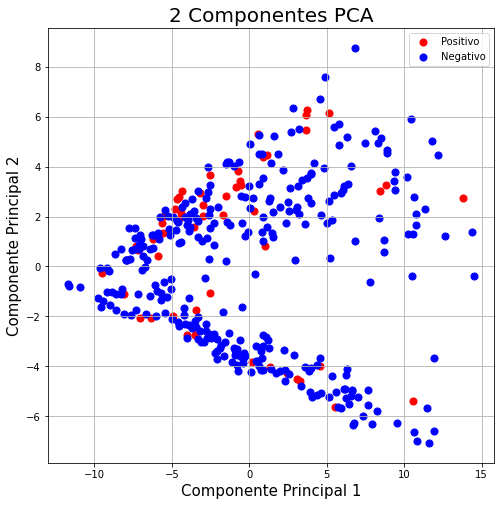

In [131]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 Componentes PCA', fontsize = 20)
targets = ['Positivo', 'Negativo']
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = df_concat_s['Diagnostico'] == target
    ax.scatter(df_concat_s.loc[indicesToKeep, 'Component 1']
               , df_concat_s.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [132]:
print(np.round(pca.explained_variance_ratio_,5))
print(round(sum(list(pca.explained_variance_ratio_))*100, 2))

[0.68254 0.2347  0.06248 0.0114  0.00318]
99.43


In [133]:
medias_positivas = amostras.loc[amostras['Diagnostico'] == 'Positivo'].mean(axis=0)
medias_negativas = amostras.loc[amostras['Diagnostico'] == 'Negativo'].mean(axis=0)

C:\Users\sodre\AppData\Local\Temp/ipykernel_14660/2016634271.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medias_positivas = amostras.loc[amostras['Diagnostico'] == 'Positivo'].mean(axis=0)
C:\Users\sodre\AppData\Local\Temp/ipykernel_14660/2016634271.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medias_negativas = amostras.loc[amostras['Diagnostico'] == 'Negativo'].mean(axis=0)


In [134]:
print(medias_positivas)

Wavelength
350     0.186272
351     0.189755
352     0.192748
353     0.195446
354     0.198778
          ...   
1368    0.029796
1369    0.029522
1370    0.029262
1371    0.029008
1372    0.028767
Length: 1023, dtype: float64


In [135]:
print(medias_negativas)

Wavelength
350     0.162655
351     0.164797
352     0.167170
353     0.169844
354     0.172511
          ...   
1368    0.019190
1369    0.018819
1370    0.018460
1371    0.018108
1372    0.017771
Length: 1023, dtype: float64


In [208]:
variancia_positiva = amostras.loc[amostras['Diagnostico'] == 'Positivo'].std(axis=0)
variancia_negativa = amostras.loc[amostras['Diagnostico'] == 'Negativo'].std(axis=0)

C:\Users\sodre\AppData\Local\Temp/ipykernel_14660/2473188447.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variancia_positiva = amostras.loc[amostras['Diagnostico'] == 'Positivo'].std(axis=0)
C:\Users\sodre\AppData\Local\Temp/ipykernel_14660/2473188447.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variancia_negativa = amostras.loc[amostras['Diagnostico'] == 'Negativo'].std(axis=0)


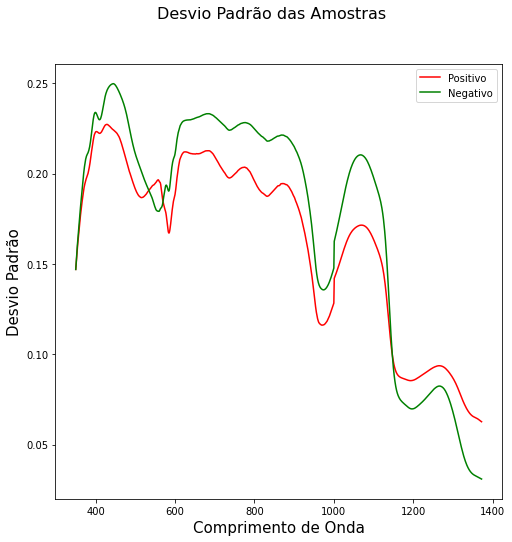

In [210]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Comprimento de Onda', fontsize = 15)
ax.set_ylabel('Desvio Padrão', fontsize = 15)
ax.plot(variancia_positiva,color='r',label = 'Positivo')
ax.plot(variancia_negativa,color='g',label = 'Negativo')
fig.suptitle('Desvio Padrão das Amostras', fontsize=16)
ax.legend()

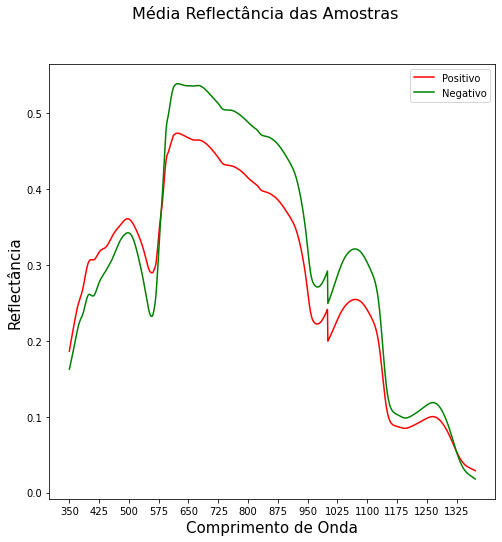

In [193]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(350, 1400, 75))
ax.set_xlabel('Comprimento de Onda', fontsize = 15)
ax.set_ylabel('Reflectância', fontsize = 15)
ax.plot(medias_positivas,color='r',label = 'Positivo')
ax.plot(medias_negativas,color='g',label = 'Negativo')
fig.suptitle('Média Reflectância das Amostras', fontsize=16)
ax.legend()

In [139]:
#boxplot para pontos de inflexão, gráfico de violino

In [140]:
amostras[500]

A3791_e    0.080630
A3792_e    0.068434
A3793_e    0.218520
A3797_e    0.197905
A3798_e    0.194521
             ...   
A2645      0.695811
A2646      0.299140
A2647      0.412661
A2648      0.624313
A2649      0.496929
Name: 500, Length: 365, dtype: float64

In [141]:
amostras.loc[amostras[500] == amostras[500].max()]

Wavelength,350,351,352,353,354,355,356,357,358,359,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,Diagnostico
A2612,0.619918,0.63179,0.644436,0.656648,0.66664,0.679089,0.691082,0.700421,0.708691,0.716965,...,0.005366,0.005173,0.004976,0.004778,0.004592,0.004401,0.004232,0.004085,0.003936,Negativo


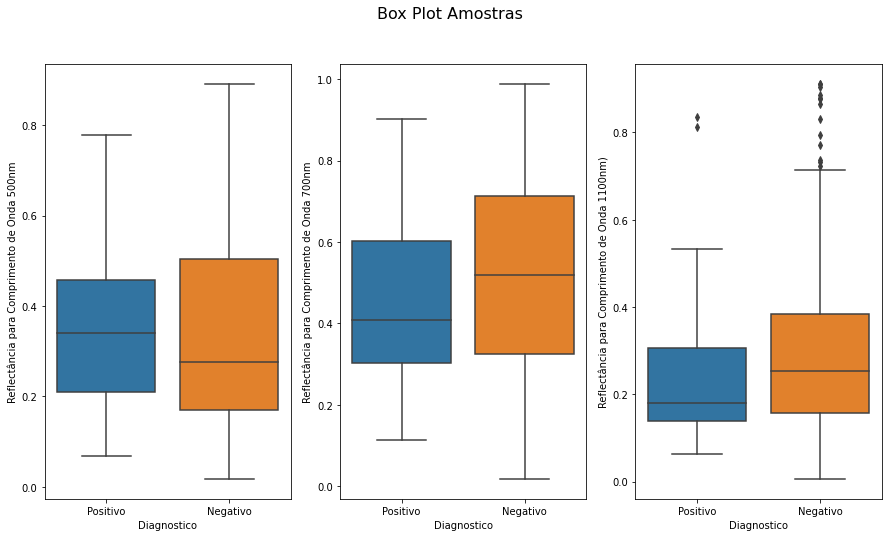

In [197]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=amostras['Diagnostico'],y=amostras[500],ax = axs[0])
sns.boxplot(x=amostras['Diagnostico'],y=amostras[700],ax = axs[1])
sns.boxplot(x=amostras['Diagnostico'],y=amostras[1100],ax = axs[2])
axs[0].set_ylabel('Reflectância para Comprimento de Onda 500nm')
axs[1].set_ylabel('Reflectância para Comprimento de Onda 700nm')
axs[2].set_ylabel('Reflectância para Comprimento de Onda 1100nm')
fig.suptitle('Box Plot Amostras', fontsize=16)
fig.set_size_inches(15,8)

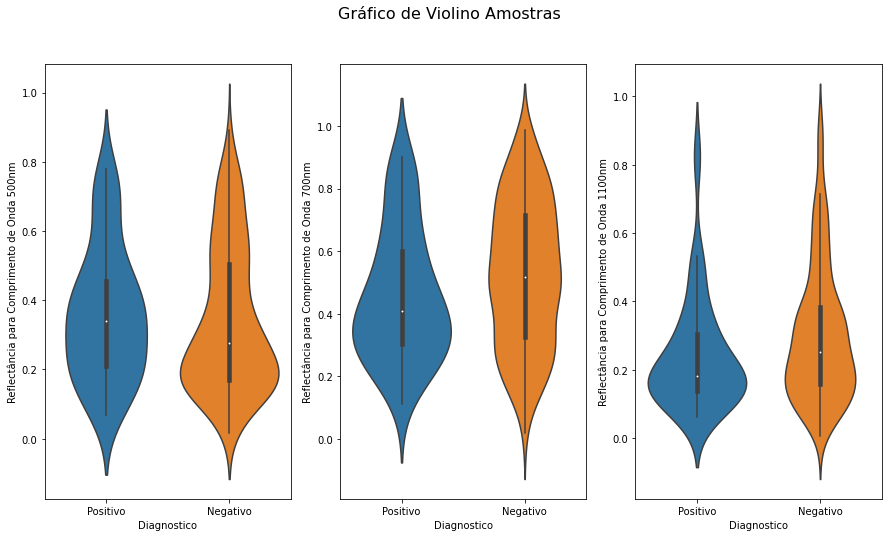

In [143]:
fig, axs = plt.subplots(ncols=3)
sns.violinplot(x=amostras['Diagnostico'],y=amostras[500],ax = axs[0])
sns.violinplot(x=amostras['Diagnostico'],y=amostras[700],ax = axs[1])
sns.violinplot(x=amostras['Diagnostico'],y=amostras[1100],ax = axs[2])
axs[0].set_ylabel('Reflectância para Comprimento de Onda 500nm')
axs[1].set_ylabel('Reflectância para Comprimento de Onda 700nm')
axs[2].set_ylabel('Reflectância para Comprimento de Onda 1100nm')

fig.suptitle('Gráfico de Violino Amostras', fontsize=16)
fig.set_size_inches(15,8)

In [177]:
amostras_rolling_avg = amostras.rolling(10,axis=1).mean().join(amostras_diag)

In [178]:
print(amostras_rolling_avg.head(5))
amostras_rolling_avg = amostras_rolling_avg.dropna(axis = 1)
print(amostras_rolling_avg.head(5))

         350  351  352  353  354  355  356  357  358       359  ...      1364  \
A3791_e  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.021657  ...  0.005852   
A3792_e  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.009672  ...  0.003390   
A3793_e  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.019817  ...  0.005663   
A3797_e  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.023952  ...  0.003856   
A3798_e  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.021545  ...  0.005414   

             1365      1366      1367      1368      1369      1370      1371  \
A3791_e  0.005775  0.005701  0.005626  0.005553  0.005482  0.005412  0.005343   
A3792_e  0.003276  0.003165  0.003054  0.002944  0.002837  0.002734  0.002634   
A3793_e  0.005387  0.005121  0.004860  0.004607  0.004362  0.004124  0.003894   
A3797_e  0.003704  0.003559  0.003419  0.003284  0.003152  0.003025  0.002901   
A3798_e  0.005169  0.004932  0.004703  0.004481  0.004264  0.004052  0.003845   

             1372  Diagnos

In [205]:
medias_positivas_rolling = amostras_rolling_avg.loc[amostras_rolling_avg['Diagnostico'] == 'Positivo'].drop(labels = 'Diagnostico',axis = 1).mean(axis=0)
medias_negativas_rolling = amostras_rolling_avg.loc[amostras_rolling_avg['Diagnostico'] == 'Negativo'].drop(labels = 'Diagnostico',axis  =1).mean(axis=0)

variancia_positiva_rolling = amostras.loc[amostras['Diagnostico'] == 'Positivo'].std(axis=0)
variancia_negativa_rolling = amostras.loc[amostras['Diagnostico'] == 'Negativo'].std(axis=0)

C:\Users\sodre\AppData\Local\Temp/ipykernel_14660/1686150175.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variancia_positiva_rolling = amostras.loc[amostras['Diagnostico'] == 'Positivo'].std(axis=0)
C:\Users\sodre\AppData\Local\Temp/ipykernel_14660/1686150175.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variancia_negativa_rolling = amostras.loc[amostras['Diagnostico'] == 'Negativo'].std(axis=0)


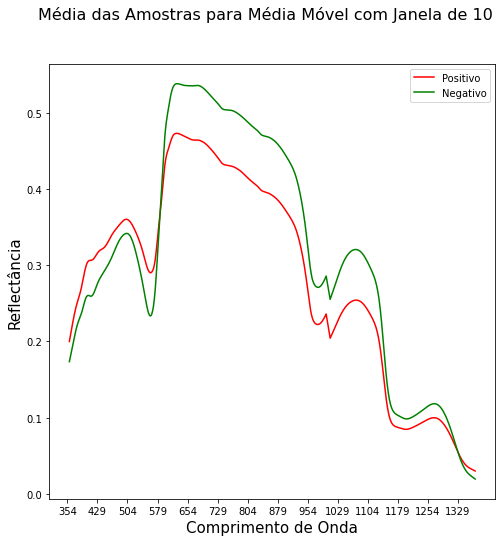

In [204]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(354, 1400, 75))
ax.set_xlabel('Comprimento de Onda', fontsize = 15)
ax.set_ylabel('Reflectância', fontsize = 15)
ax.plot(medias_positivas_rolling,color='r',label = 'Positivo')
ax.plot(medias_negativas_rolling,color='g',label = 'Negativo')
fig.suptitle('Média das Amostras para Média Móvel com Janela de 10', fontsize=16)
ax.legend()

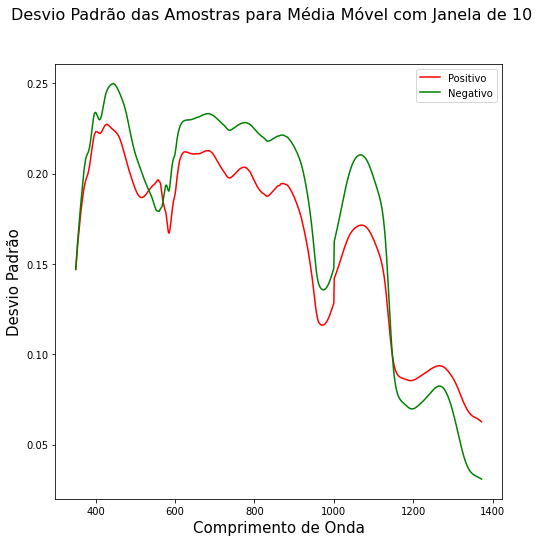

In [211]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Comprimento de Onda', fontsize = 15)
ax.set_ylabel('Desvio Padrão', fontsize = 15)
ax.plot(variancia_positiva_rolling,color='r',label = 'Positivo')
ax.plot(variancia_negativa_rolling,color='g',label = 'Negativo')
fig.suptitle('Desvio Padrão das Amostras para Média Móvel com Janela de 10', fontsize=16)
ax.legend()

In [187]:
features_rolling = amostras_rolling_avg.loc[:,~amostras_rolling_avg.columns.isin(['Diagnostico'])].values

In [188]:
target_rolling = amostras_rolling_avg.loc[:,['Diagnostico']].values

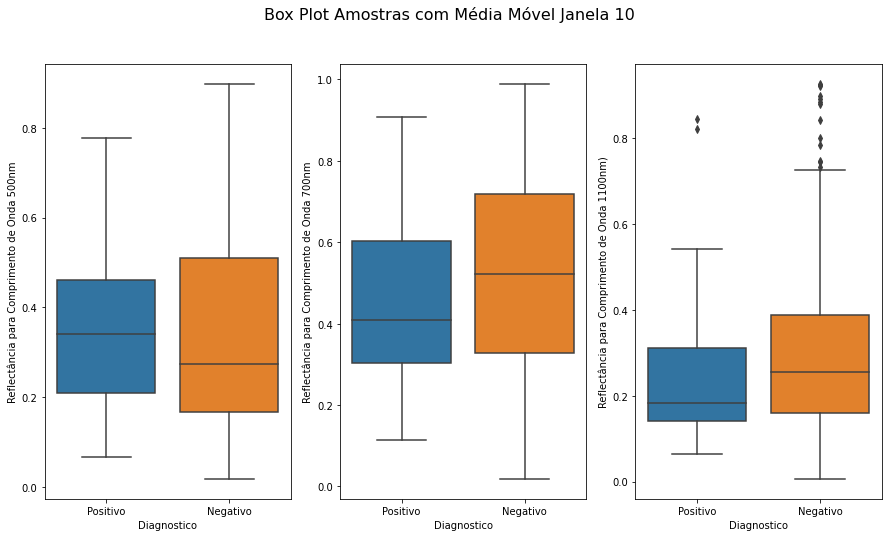

In [191]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=amostras_rolling_avg ['Diagnostico'],y=amostras_rolling_avg[500],ax = axs[0])
sns.boxplot(x=amostras_rolling_avg ['Diagnostico'],y=amostras_rolling_avg[700],ax = axs[1])
sns.boxplot(x=amostras_rolling_avg ['Diagnostico'],y=amostras_rolling_avg[1100],ax = axs[2])
axs[0].set_ylabel('Reflectância para Comprimento de Onda 500nm')
axs[1].set_ylabel('Reflectância para Comprimento de Onda 700nm')
axs[2].set_ylabel('Reflectância para Comprimento de Onda 1100nm)')
fig.suptitle('Box Plot Amostras com Média Móvel Janela 10', fontsize=16)
fig.set_size_inches(15,8)

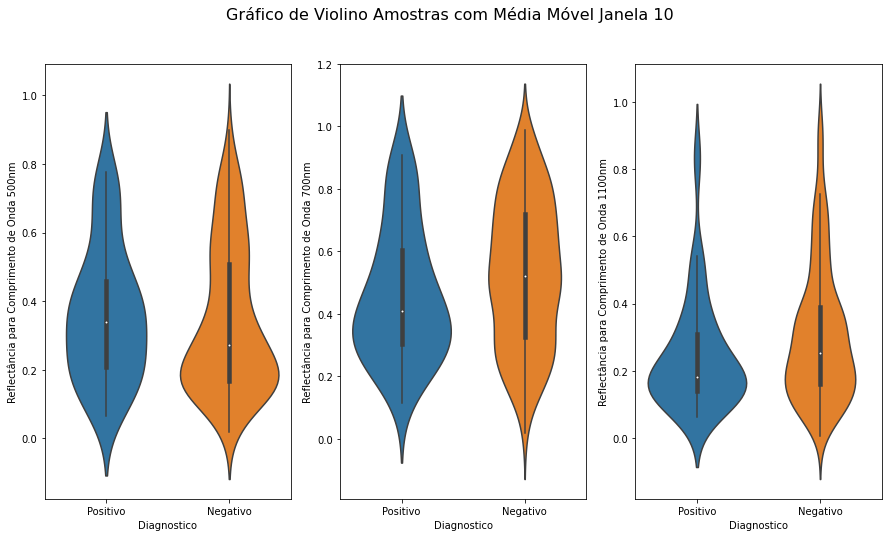

In [192]:
fig, axs = plt.subplots(ncols=3)
sns.violinplot(x=amostras_rolling_avg ['Diagnostico'],y=amostras_rolling_avg [500],ax = axs[0])
sns.violinplot(x=amostras_rolling_avg ['Diagnostico'],y=amostras_rolling_avg [700],ax = axs[1])
sns.violinplot(x=amostras_rolling_avg ['Diagnostico'],y=amostras_rolling_avg [1100],ax = axs[2])
axs[0].set_ylabel('Reflectância para Comprimento de Onda 500nm')
axs[1].set_ylabel('Reflectância para Comprimento de Onda 700nm')
axs[2].set_ylabel('Reflectância para Comprimento de Onda 1100nm')

fig.suptitle('Gráfico de Violino Amostras com Média Móvel Janela 10', fontsize=16)
fig.set_size_inches(15,8)